In [72]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [73]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


## Prepare Dataset

In [74]:
df1 = pd.read_csv('../07. Pemodelan Data (Data Mining)/dataset/Dataset_clean(penelitian).csv')
df2 = pd.read_csv('../07. Pemodelan Data (Data Mining)/dataset/Dataset_clean(aplikasi).csv')

train_df_path = pd.concat([df1, df2])

In [75]:
train_df = train_df_path[['full_text', 'emotion']]
train_df

train_df = train_df.dropna()
#hitung baris yang memiliki kata Skipped due to content policy
skipped_rows = train_df[train_df['full_text'] == 'Skipped due to content policy']
print("Number of rows with 'Skipped due to content policy':", len(skipped_rows))


Number of rows with 'Skipped due to content policy': 0


In [76]:
train_df.head(10)

,full_text,emotion
0,pengabdian terpuji meskipun terlihat biasa,Neutral
1,baru mengirim foto,Neutral
2,apa kabar dunia twitter masihkah selucu seabsu...,Neutral
3,yah gimana sih yaudah susul sebelumnya sarapan...,Neutral
4,ka dorg suro beli medium set,Neutral
5,ayo cek koleksinya temukan angry draken unik n...,Neutral
6,kalau biasa biasa sudah,Neutral
7,tiap tiap twit tak selalu perlu pesan moral ka...,Neutral
8,halo v apa kabar nih,Neutral
9,pagi ruby apa kabar,Neutral


In [77]:
train_df.head(10)

,full_text,emotion
0,pengabdian terpuji meskipun terlihat biasa,Neutral
1,baru mengirim foto,Neutral
2,apa kabar dunia twitter masihkah selucu seabsu...,Neutral
3,yah gimana sih yaudah susul sebelumnya sarapan...,Neutral
4,ka dorg suro beli medium set,Neutral
5,ayo cek koleksinya temukan angry draken unik n...,Neutral
6,kalau biasa biasa sudah,Neutral
7,tiap tiap twit tak selalu perlu pesan moral ka...,Neutral
8,halo v apa kabar nih,Neutral
9,pagi ruby apa kabar,Neutral


In [78]:
def get_label_idx(label):
    if label == 'Fear':
        return 5
    if label == 'Sad':
        return 4
    if label == 'Love':
        return 3
    if label == 'Joy':
        return 2
    if label == 'Anger':
        return 1
    if label == 'Neutral':
        return 0
train_df['emotion'] = train_df['emotion'].apply(get_label_idx)

All labels are valid.


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

: 

In [ ]:
train_df

,full_text,emotion
0,pengabdian terpuji meskipun terlihat biasa,0.0
1,baru mengirim foto,0.0
2,apa kabar dunia twitter masihkah selucu seabsu...,0.0
3,yah gimana sih yaudah susul sebelumnya sarapan...,0.0
4,ka dorg suro beli medium set,0.0
...,...,...
28614,cod beli euphoria wonderland la foret fairy ha...,2.0
28615,ลองด cod flash sale ก โล แมคคายกกระสอบ ต กก ต ...,2.0
28616,wal cod an shopee kawa pakai qris lah yuu,0.0
28617,temukan bisa cod light stick treasure bluetoot...,0.0


In [ ]:
jumlah_netral = len(train_df[train_df['emotion'] == 0])
jumlah_marah = len(train_df[train_df['emotion'] == 1])
jumlah_senang = len(train_df[train_df['emotion'] == 2])
jumlah_cinta = len(train_df[train_df['emotion'] == 3])
jumlah_sedih = len(train_df[train_df['emotion'] == 4])
jumlah_takut = len(train_df[train_df['emotion'] == 5])

print("Jumlah Netral: ", jumlah_netral)
print("Jumlah Marah: ", jumlah_marah)
print("Jumlah Senang: ", jumlah_senang)
print("Jumlah Cinta: ", jumlah_cinta)
print("Jumlah Sedih: ", jumlah_sedih)
print("Jumlah Takut: ", jumlah_takut)

Jumlah Netral:  12981
Jumlah Marah:  11069
Jumlah Senang:  12307
Jumlah Cinta:  5389
Jumlah Sedih:  7272
Jumlah Takut:  7996


In [ ]:
# Split dataset menjadi fitur (X) dan label (y)
X_train = train_df['full_text']
y_train = train_df['emotion']


In [ ]:
##split dataset
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((51570,), (5730,), (51570,), (5730,))

## Generate Padded Sequence

In [ ]:
# Parameters

vocab_size = 60000 #ukuran kosakata yang akan digunakan
max_length = 50 #panjang maksimal dari sebuah kalimat
embedding_dim = 8 #dimensi vektor embedding yang akan digunakan
trunc_type='post' #jika panjang kalimat melebihi max_length, potong bagian belakang kalimat
oov_tok = "<OOV>" #OOV (Out Of Vocabulary) token, jika suatu kata tidak ditemukan dalam kosakata

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import re

# Define the "all_texts" variable
X_train = [str(text) for text in X_train]
X_valid = [str(text) for text in X_valid]

# Tokenisasi
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Gabungkan semua teks untuk membuat kamus indeks kata
all_texts = list(X_train) + list(X_valid)

# Membuat kamus indeks kata
tokenizer.fit_on_texts(all_texts)
word_index = tokenizer.word_index
word_index


# Konversi kalimat menjadi urutan kata
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type, padding="post")

valid_sequences = tokenizer.texts_to_sequences(X_valid)
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type, padding="post")




### kamus data untuk api Training

In [ ]:
# import pickle

# Simpan tokenizer ke dalam file
# with open('tokenizer-2classes-no-stemming.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
print(train_padded[0])

[392  48 398   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


## Word Embedding

In [ ]:
from gensim.models import Word2Vec

# Gabungkan data pelatihan dan validasi
sentences = [sentence.split() for sentence in X_train] + [sentence.split() for sentence in X_valid]

# Latih model Word2Vec
w2v_model = Word2Vec(sentences, vector_size=8, window=5, min_count=1, workers=4)

In [ ]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 8))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
        

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-4.85604858,  0.85270661,  5.8692441 , ..., -1.49205077,
         2.31384468,  0.24273494],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# Mencari kata berdasarkan vektor tertentu
def find_word_by_vector(embedding_matrix, vector):
    for word, index in word_index.items():
        if np.array_equal(embedding_matrix[index], vector):
            return word, embedding_matrix[index]
    return None

# Contoh: Mencari kata untuk vektor embedding_matrix[3]
word = find_word_by_vector(embedding_matrix, embedding_matrix[345])
print(word)

('katanya', array([-4.39814949,  0.33214766,  2.90478158,  0.8791942 ,  1.33820426,
       -0.62841296,  1.93253481, -0.9269076 ]))


## Build and Compile Model

In [ ]:
# convert to bi-lstm model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 8, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), 
              input_shape=(max_length,), trainable=False),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 8)          │       480,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50, 128)        │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 960,198 (3.66 MB)

 Trainable params: 480,198 (1.83 MB)

 Non-trainable params: 480,000 (1.83 MB)

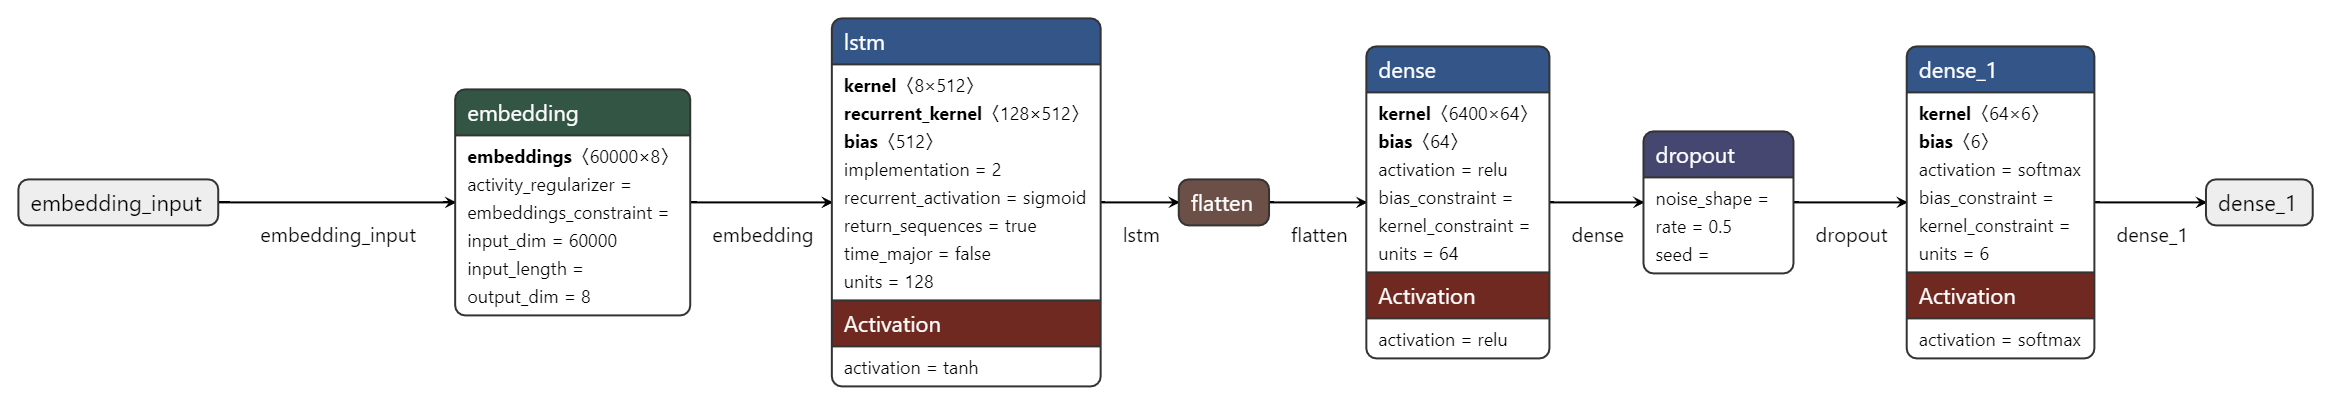

In [ ]:
# Looping untuk mendapatkan bobot dari setiap layer
for layer in model.layers:
    # Mengecek apakah layer memiliki bobot
    if layer.weights:
        print("Layer Name:", layer.name)
        # Mendapatkan bobot dan bias dari layer
        weights = layer.get_weights()
        for i, w in enumerate(weights):
            print("Weights Shape (Tensor {}):".format(i), w.shape)
            print("Weights (Tensor {}):".format(i))
            print(w)


Layer Name: embedding_2
Weights Shape (Tensor 0): (60000, 8)
Weights (Tensor 0):
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-4.8560486   0.8527066   5.869244   ... -1.4920508   2.3138447
   0.24273494]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Layer Name: lstm_2
Weights Shape (Tensor 0): (8, 512)
Weights (Tensor 0):
[[-0.0764378  -0.06866908  0.00985442 ...  0.06195123 -0.0773966
   0.0456075 ]
 [ 0.01349226 -0.04379286  0.01884637 ... -0.01498198  0.00803196
   0.05122709]
 [-0.06217432 -0.00736041 -0.04824508 ... -0.0359289   0.0245994
  -0.08255222]
 ...
 [-0.10682515  0.09578861 -0.01431084 ... -0.09920564  0.10683284
  -0.03446222]
 [-0.08609354 -0.04592123  0.04518383 ... -0.01388635  0.00994065
 

## Train Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

num_epochs = 100

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

history = model.fit(
    train_padded, 
    y_train, 
    batch_size=128, 
    epochs=num_epochs, 
    validation_data=(valid_padded, y_valid), 
)

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\asyncio\events.py", line 80, in _run

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\TEMP\AppData\Local\Temp\ipykernel_14032\4240840867.py", line 7, in <module>

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 318, in fit

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\trainers\trainer.py", line 357, in _compute_loss

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\trainers\trainer.py", line 325, in compute_loss

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\losses\losses.py", line 1853, in sparse_categorical_crossentropy

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\ops\nn.py", line 1567, in sparse_categorical_crossentropy

  File "c:\Users\TEMP\miniconda3\envs\skripsi\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 645, in sparse_categorical_crossentropy

Received a label value of -9223372036854775808 which is outside the valid range of [0, 6).  Label values: 5 3 4 4 0 2 0 3 3 3 4 3 2 2 2 0 1 4 -9223372036854775808 0 0 5 0 2 0 2 5 2 1 0 3 1 0 1 2 5 5 1 2 4 1 1 0 0 2 1 4 1 1 0 1 4 3 0 2 1 3 2 0 0 0 0 0 5 0 4 4 3 0 4 1 2 5 5 2 1 2 2 1 3 3 5 4 4 0 5 0 0 2 3 1 5 3 0 1 5 1 2 5 1 2 2 4 4 2 4 4 4 3 2 4 2 4 0 1 4 1 1 2 1 5 0 4 2 1 4 4 -9223372036854775808
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_8171]

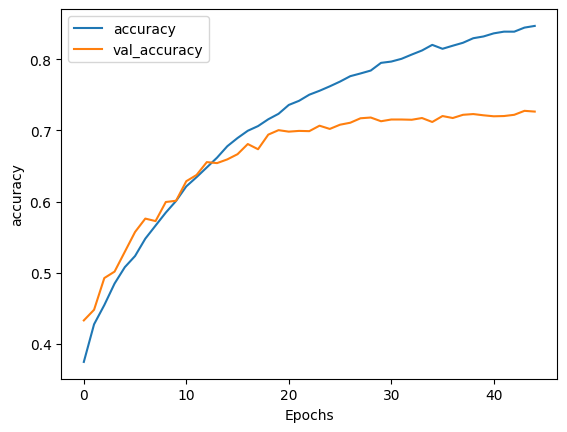

In [ ]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")

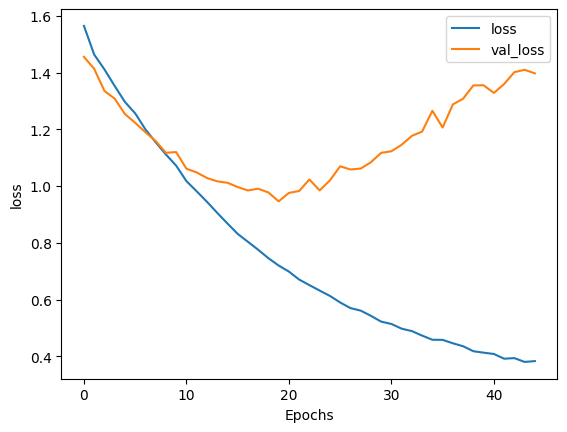

In [ ]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "loss")

In [ ]:
#sklearn report
from sklearn.metrics import classification_report

loss, accuracy = model.evaluate(valid_padded, y_valid)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

y_pred = model.predict(valid_padded)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_valid, y_pred))

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7041 - loss: 0.9378
Loss:  0.9461613893508911
Accuracy:  0.700348436832428
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
              precision    recall  f1-score   support

           0       0.41      0.28      0.34       306
           1       0.64      0.81      0.72       577
           2       0.69      0.78      0.73       647
           3       0.72      0.70      0.71       466
           4       0.84      0.75      0.79       492
           5       0.85      0.67      0.75       382

    accuracy                           0.70      2870
   macro avg       0.69      0.67      0.67      2870
weighted avg       0.70      0.70      0.70      2870



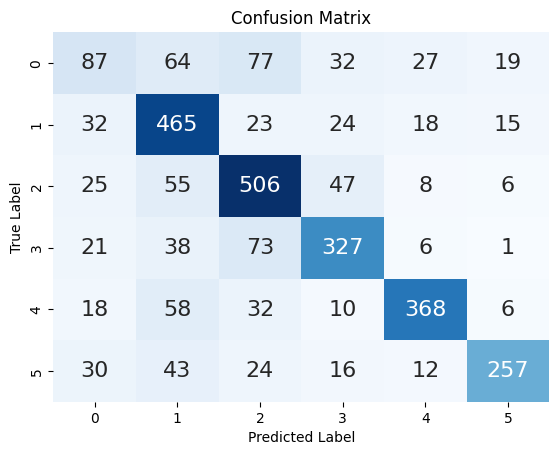

In [ ]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Membuat confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print(cm)

[[ 87  64  77  32  27  19]
 [ 32 465  23  24  18  15]
 [ 25  55 506  47   8   6]
 [ 21  38  73 327   6   1]
 [ 18  58  32  10 368   6]
 [ 30  43  24  16  12 257]]


In [ ]:
#predict another data input from the model
def predict_emotion(text):
    # Tokenisasi
    text = [text]
    sequences = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type, padding="post")
    
    # Prediksi
    pred = model.predict(padded)

    print("Prediksi:", pred)
    pred = np.argmax(pred, axis=1)
    

    # Mengembalikan label emosi
    if pred == 0:
        return "Neutral"
    elif pred == 1:
        return "Anger"
    elif pred == 2:
        return "Joy"
    elif pred == 3:
        return "Love"
    elif pred == 4:
        return "Sad"
    elif pred == 5:
        return "Fear"

#make 10 senteces twitter in predict emotion
predict_emotion("saya sangat senang hari ini")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediksi: [[0.1524879  0.08834448 0.4407805  0.13450786 0.09640579 0.0874735 ]]


'Joy'

In [ ]:
#save model
model.save('./model/model-lstm.h5')